In [1]:
# Import libraries
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt

In [2]:
# Load piano audio into librosa
piano_path = './audio/piano_c.wav'
piano, sr = librosa.load(piano_path)

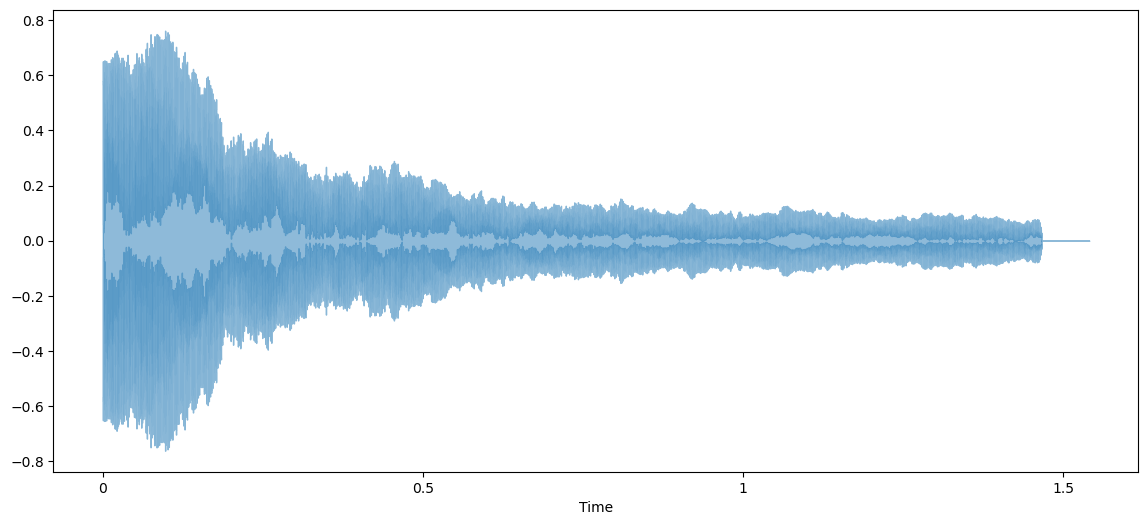

In [3]:
# Visualize the waveform with librosa
plt.figure(figsize=(14, 6))
librosa.display.waveshow(y=piano, sr=sr, alpha=0.5)
plt.show()

In [4]:
# Perform FFT on piano sample
piano_fft = sp.fft.fft(piano)
magnitude = np.absolute(piano_fft)
frequency = np.linspace(start=0, stop=sr, num=len(magnitude))

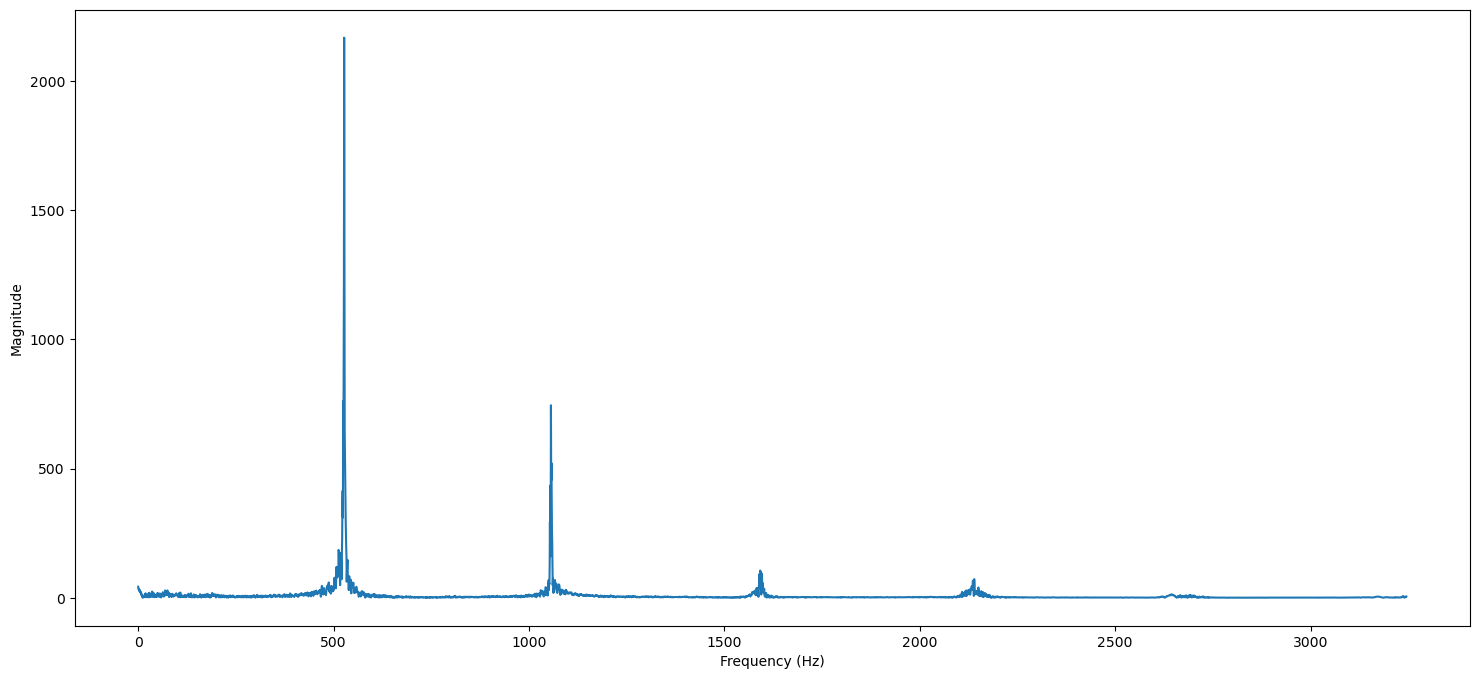

In [5]:
# Visualize the spectrum
lim = 5000
plt.figure(figsize=(18, 8))
plt.plot(frequency[:lim], magnitude[:lim])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [6]:
# Caluclate the duration of a single sample
d = 1 / sr
d

4.5351473922902495e-05

In [7]:
# Get the duration for 400 samples
duration_400_samples = 400 * d
duration_400_samples

0.018140589569160998

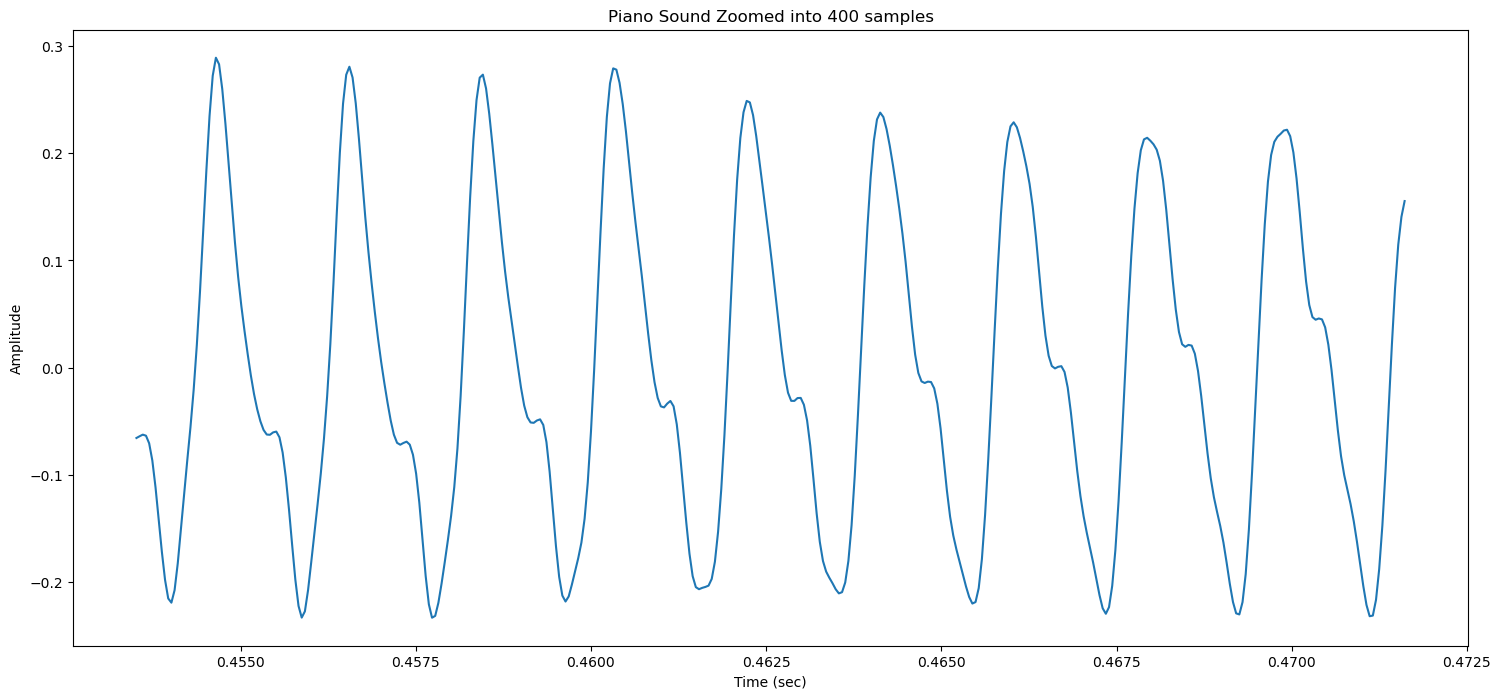

In [8]:
samples = np.arange(stop=len(piano))
t = librosa.samples_to_time(samples=samples, sr=sr)

plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], piano[10000:10400])
plt.title("Piano Sound Zoomed into 400 samples")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.show()

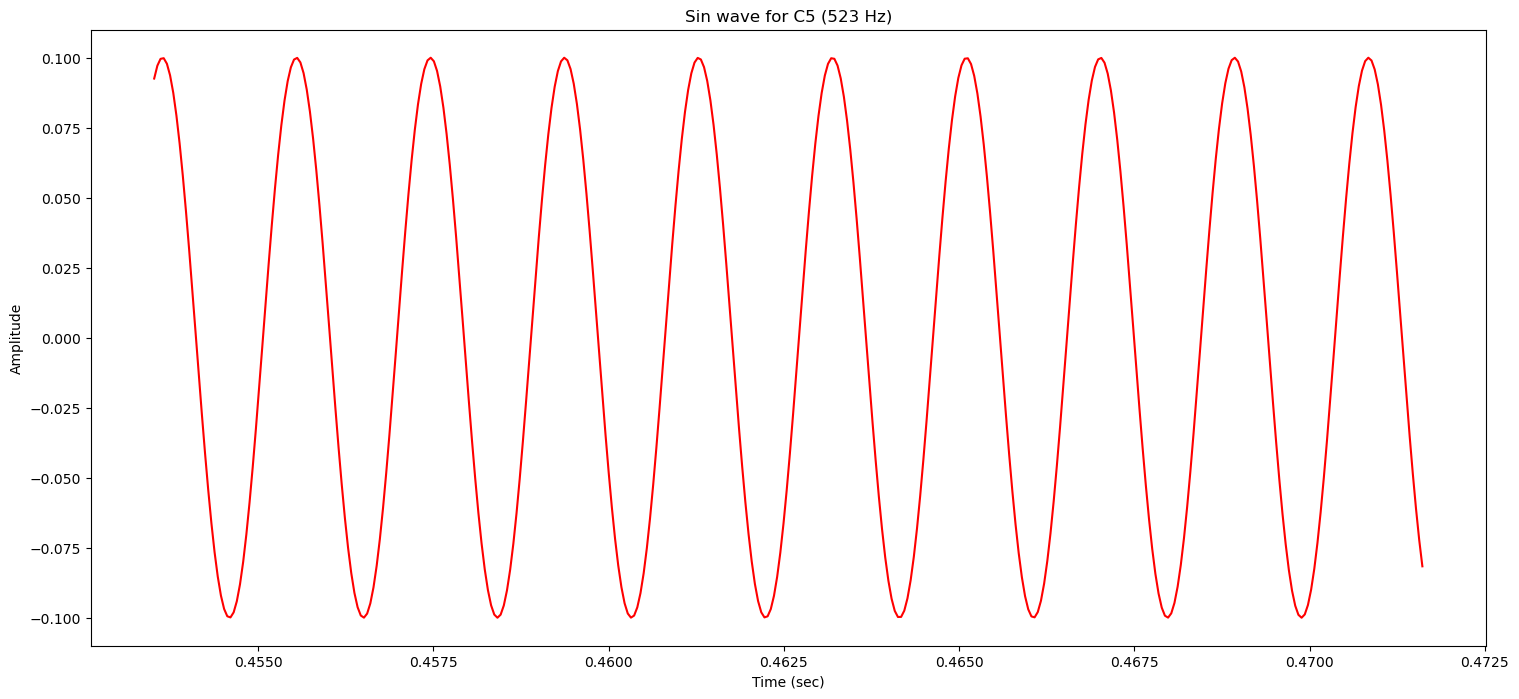

In [9]:
# Create a sinusoidal wave with the same frequency (523 Hz)
f = 523
phase = 0
sin = 0.1 * np.sin(2*np.pi * (f*t - phase))

plt.figure(figsize=(18,8))
plt.plot(t[10_000:10_400], sin[10_000:10_400], color='r')
plt.title("Sin wave for C5 (523 Hz)")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.show()

Let's try superimposing the sinusoidal wave onto the piano frequency to see what phase results in the highest similarity

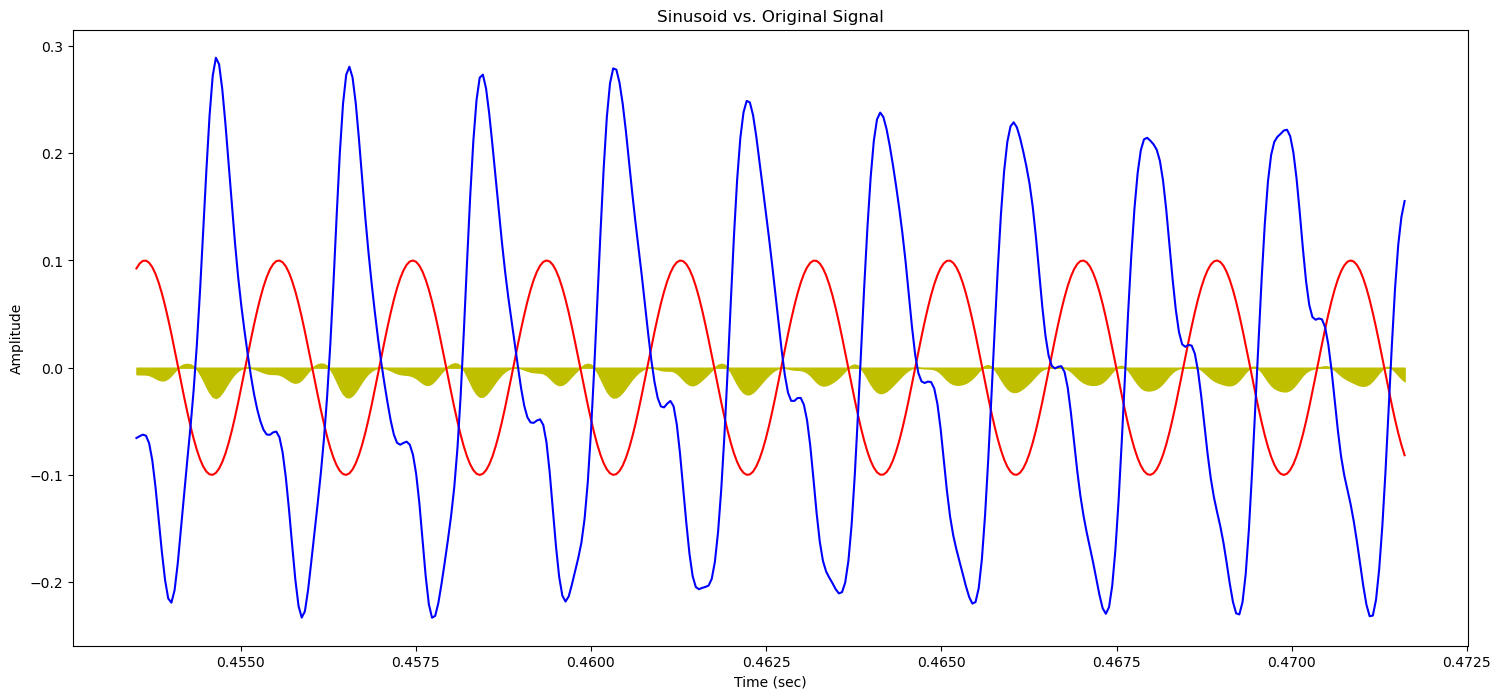

In [11]:
# Create a sinusoidal wave with the same frequency (523 Hz)
f = 523
phase = 0
sin = 0.1 * np.sin(2*np.pi * (f*t - phase))

plt.figure(figsize=(18,8))
plt.plot(t[10_000:10_400], sin[10_000:10_400], color='r')
plt.plot(t[10_000:10_400], piano[10_000:10_400], color='b')
plt.fill_between(t[10_000:10_400], sin[10_000:10_400]*piano[10_000:10_400], color='y')
plt.title("Sinusoid vs. Original Signal")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.show()

The graph above shows a method of measuring similarity between two signals: we just take the dot product between the two signals. The phase that maximizes this dot product is the one that results in the most similar signals. Here, we have found that the best phase is `phase=0.55`. This pair-wise multiplication results in only positive area. However, if we try a worse phase, say `phase=0`, we see mostly negative area, representing high dissimilarity